In [1]:
import pyro
import torch

import seaborn as sns
sns.reset_orig()

In [4]:
from libsimplesn import SimpleSN

simplesn = SimpleSN(survey='pantheon-g10', datatype='photoz', N=1046, suffix=0)
config = simplesn.config(gen=False)
truths = torch.load(simplesn.data_name)

In [7]:
torch.set_num_threads(10)

In [8]:
from pyro.infer.mcmc import MCMC, NUTS

all_sites = dict(pyro.poutine.trace(config.model).get_trace().iter_stochastic_nodes()).keys()
mcmc = MCMC(NUTS(
    config.model, adapt_mass_matrix=True, adapt_step_size=True,
    max_tree_depth=4, full_mass=False,
), num_samples=2000, warmup_steps=100, num_chains=1,
    initial_params={key: val for key in all_sites for val in [torch.as_tensor(truths[key])]}
)
mcmc.run()

Sample: 100%|██████████| 2100/2100 [18:31,  1.89it/s, step size=4.39e-02, acc. prob=0.708]


In [8]:
# simplesn.hmc_result = mcmc

In [5]:
mcmc = simplesn.hmc_result

In [6]:
mcmc.summary()


                  mean       std    median      5.0%     95.0%     n_eff     r_hat
       M0[0]    -19.38      0.18    -19.39    -19.66    -19.09     43.54      1.04
       M0[1]    -19.38      0.18    -19.39    -19.69    -19.09    107.92      1.02
       M0[2]    -19.52      0.17    -19.52    -19.81    -19.23    121.35      1.01
       M0[3]    -19.58      0.17    -19.58    -19.87    -19.31    101.01      1.00
       M0[4]    -19.41      0.17    -19.42    -19.68    -19.14     51.92      1.03
       M0[5]    -19.33      0.20    -19.33    -19.66    -19.02     42.57      1.03
       M0[6]    -19.43      0.19    -19.44    -19.74    -19.12     51.18      1.01
       M0[7]    -19.43      0.20    -19.44    -19.78    -19.11     56.64      1.02
       M0[8]    -19.44      0.18    -19.45    -19.74    -19.14     81.72      1.02
       M0[9]    -19.35      0.17    -19.35    -19.63    -19.05     30.24      1.03
      M0[10]    -19.41      0.18    -19.41    -19.69    -19.10     44.41      1.01
   

     x1[366]      2.36      0.26      2.36      1.93      2.77    295.39      1.00
     x1[367]     -0.06      0.17     -0.06     -0.33      0.24    128.98      1.00
     x1[368]      0.09      0.68      0.10     -1.02      1.23    351.54      1.00
     x1[369]      1.05      0.12      1.05      0.87      1.25    303.26      1.02
     x1[370]      0.24      0.63      0.24     -0.74      1.29    342.46      1.01
     x1[371]     -1.21      0.40     -1.21     -1.86     -0.56    218.89      1.02
     x1[372]      0.86      0.21      0.85      0.53      1.20    132.35      1.03
     x1[373]     -0.08      0.18     -0.08     -0.37      0.21    257.17      1.00
     x1[374]     -1.68      0.11     -1.67     -1.85     -1.48    258.28      1.00
     x1[375]     -0.08      0.14     -0.08     -0.30      0.17    319.85      1.00
     x1[376]      0.63      0.35      0.62      0.09      1.24    200.47      1.00
     x1[377]      0.26      0.25      0.26     -0.20      0.62    122.48      1.01
    

In [7]:
from clipppy.utils.plotting import HPMVNPlotter

plotter = HPMVNPlotter(mcmc.get_samples(10000), names_global=(
    'Om0', 'Ode0', 'sigma_z',
    'alpha', 'beta',
    'mean_M0', 'sigma_res', 'mean_x1', 'log10_R_x1', 'mean_c', 'log10_R_c'
), names_hier=('M0', 'x1', 'c', 'z'), truths=truths)

/usr/lib/python3.10/site-packages/corner/core.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(


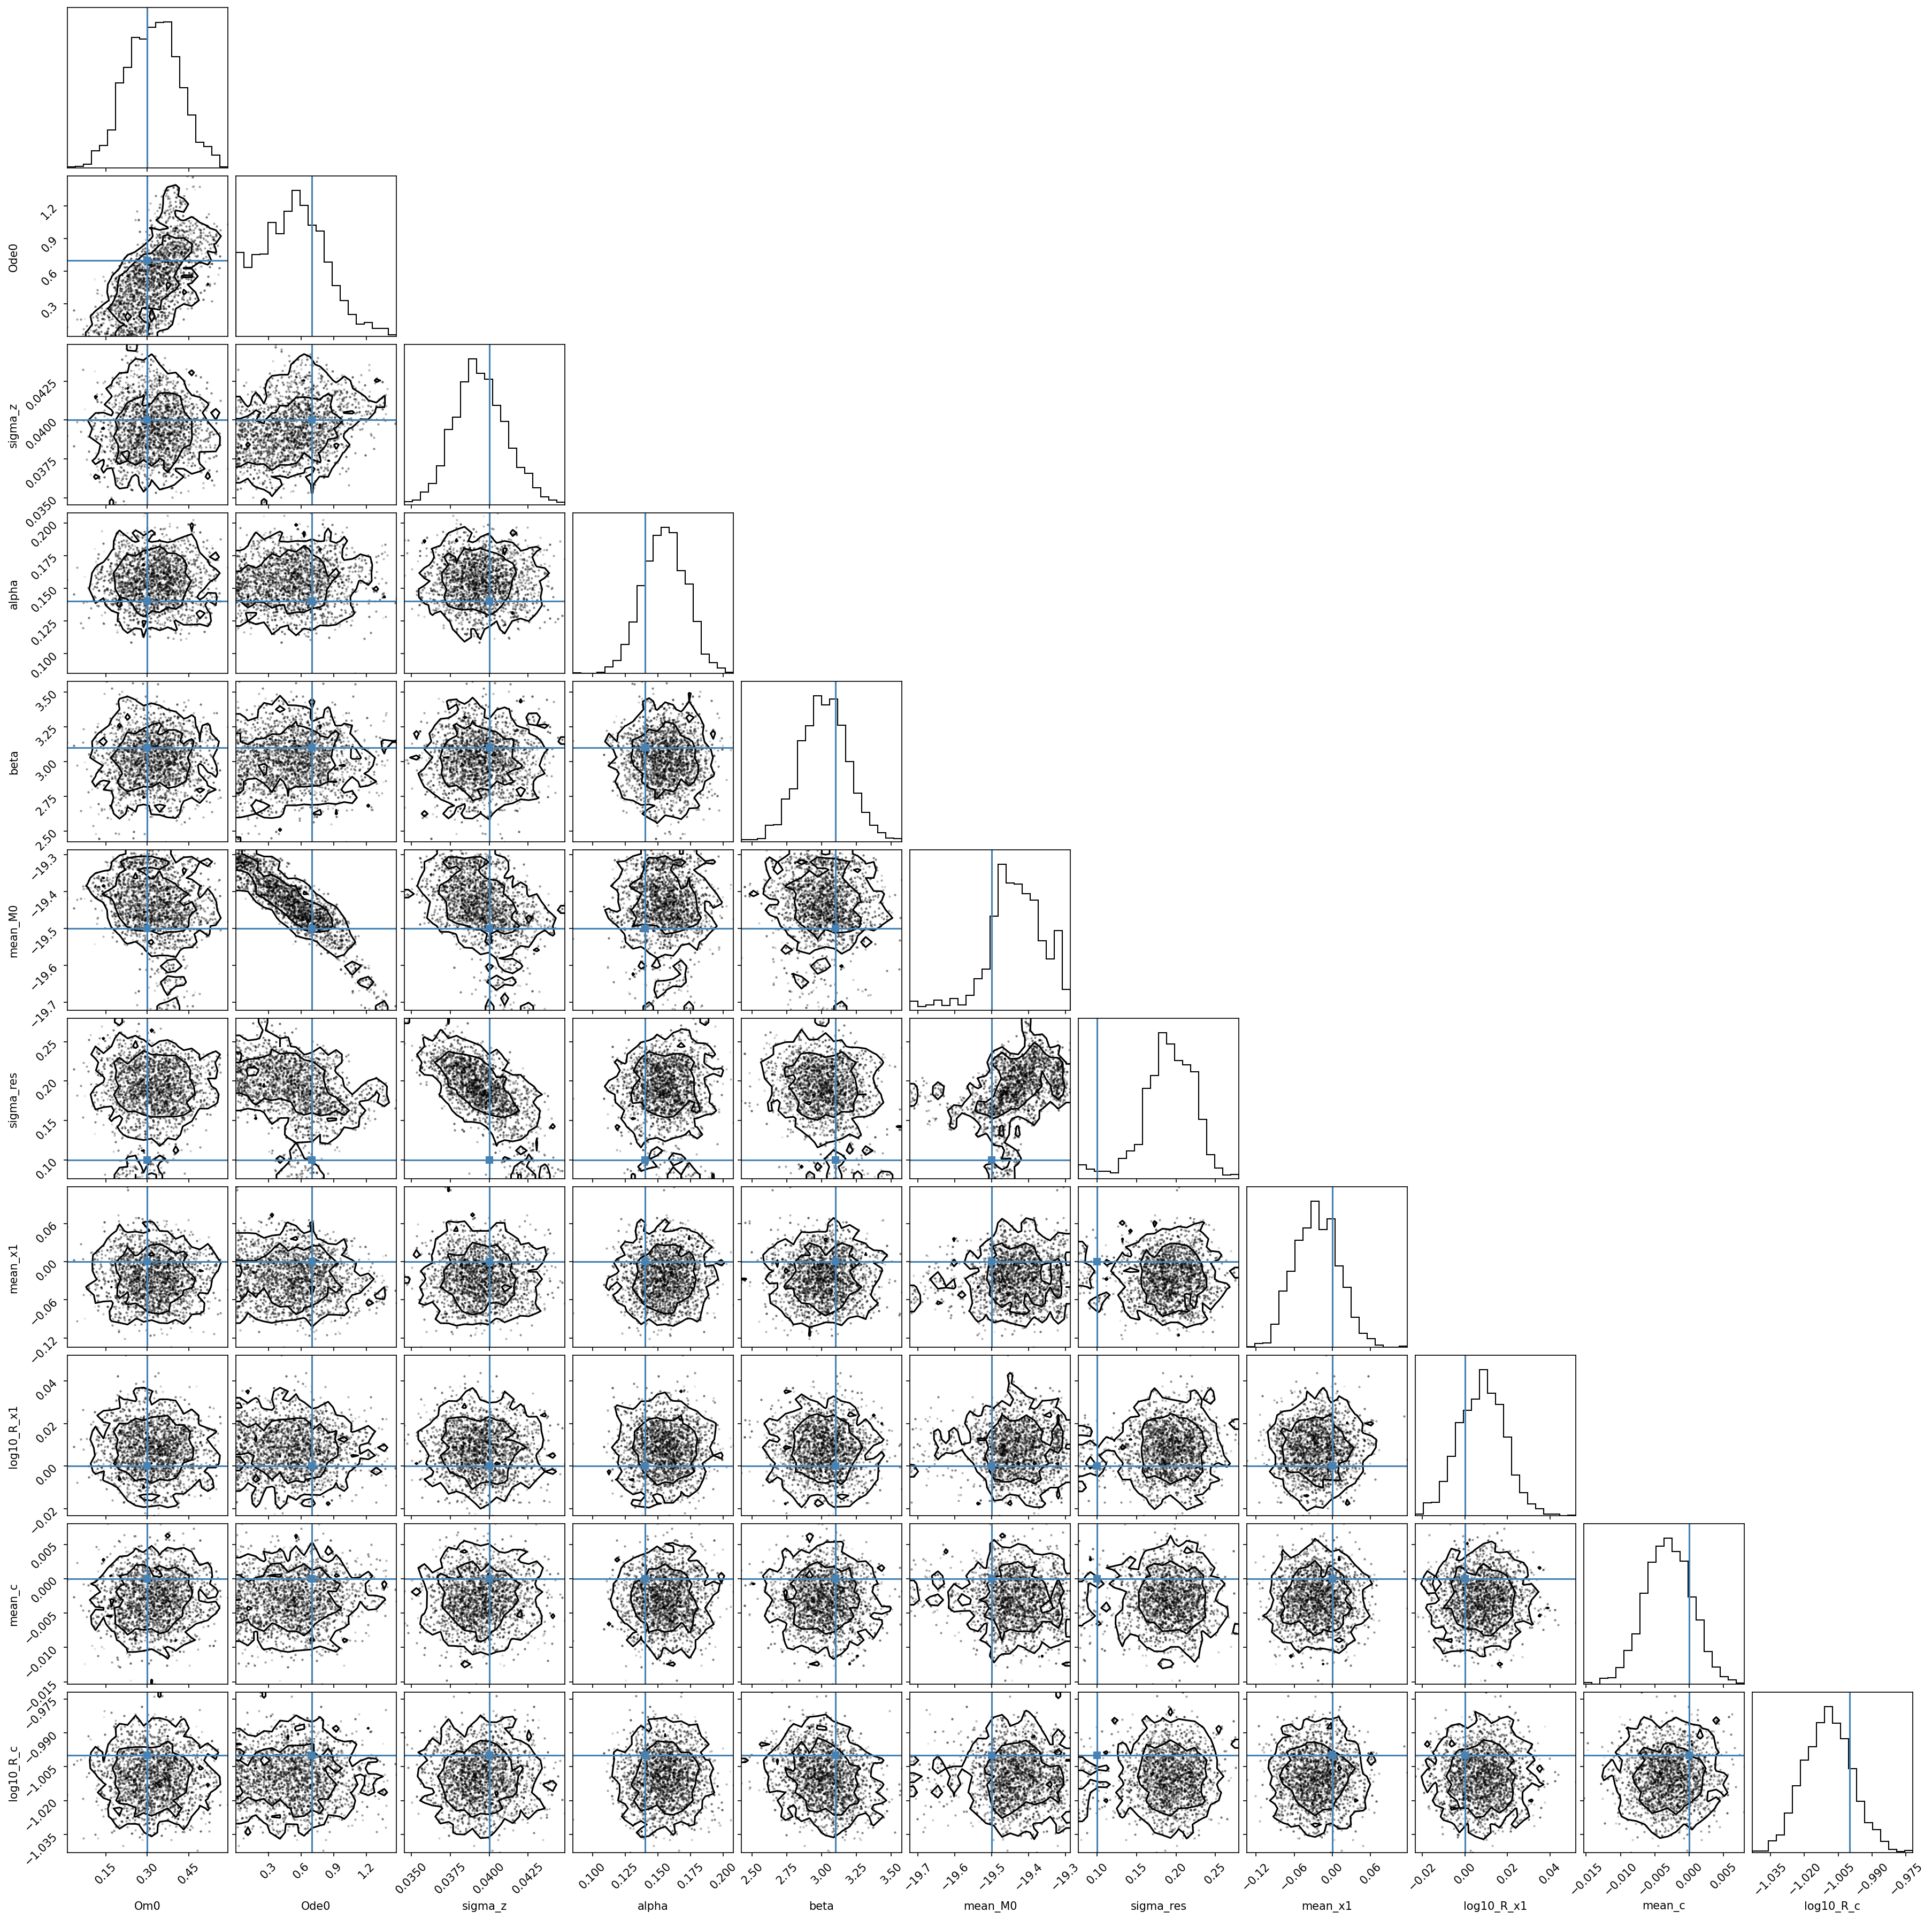

In [8]:
plotter.plot_corner();
# plt.savefig(f'{PLOTPREFIX}-g.png')

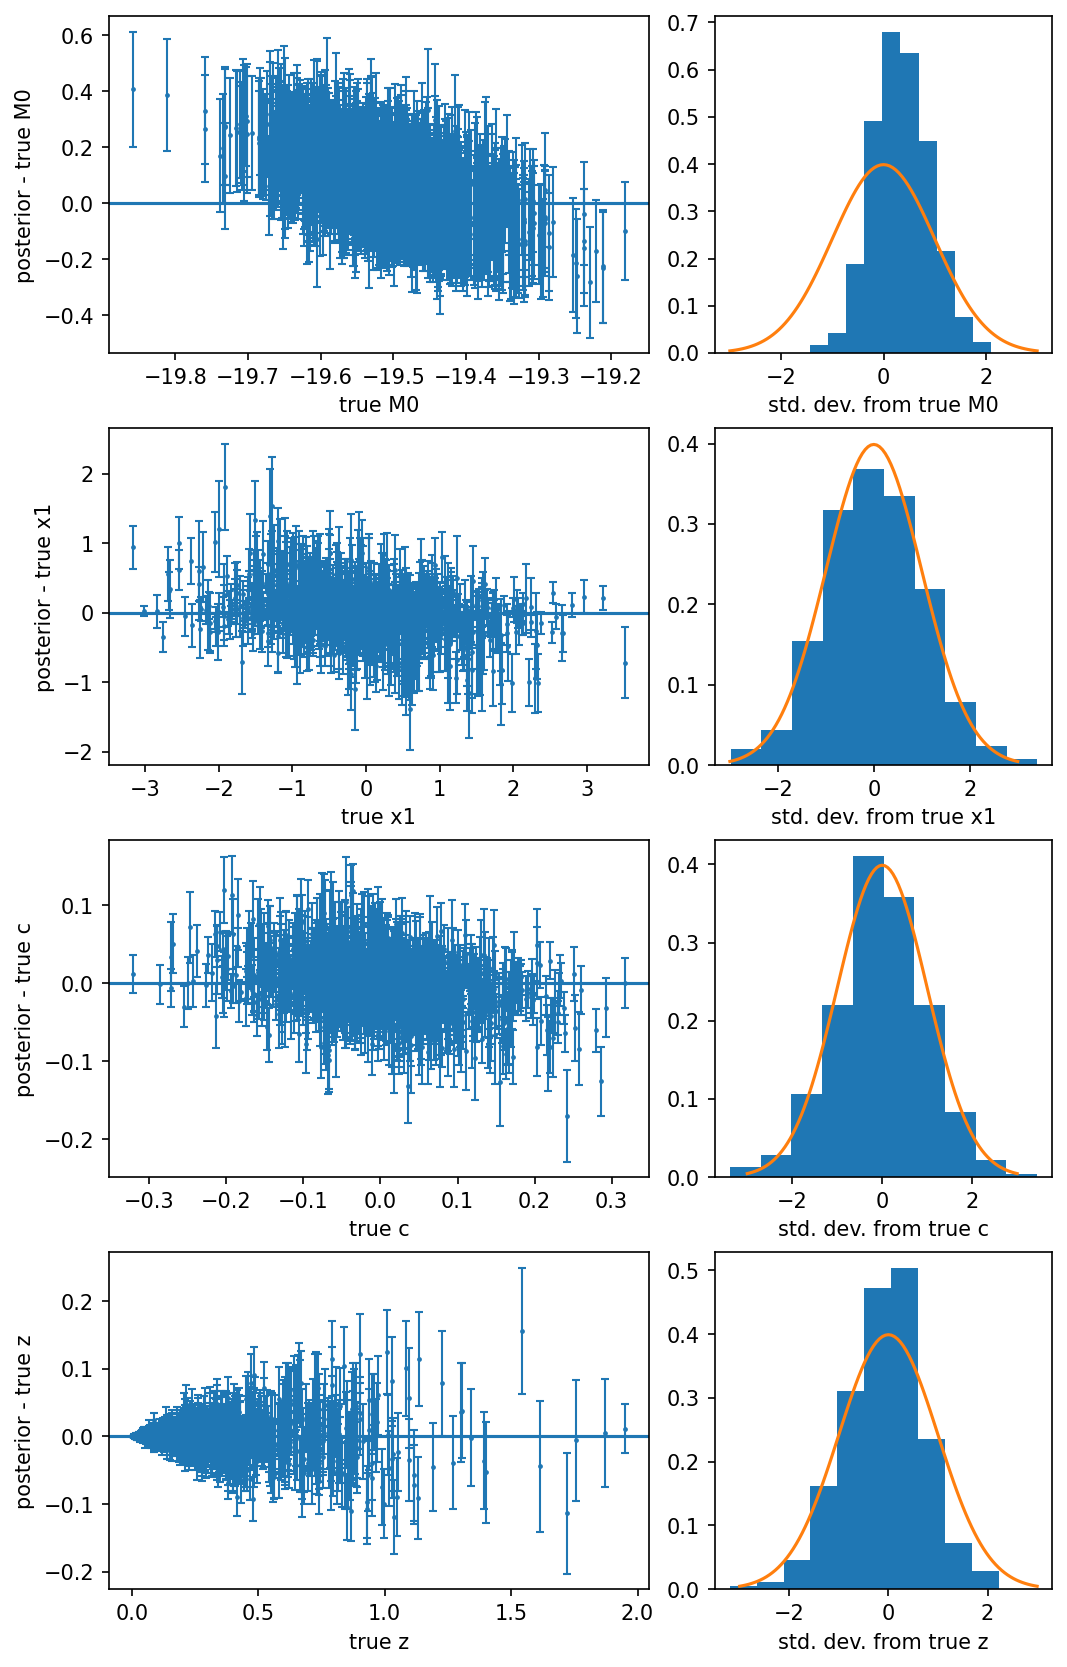

In [9]:
plotter.plot_hier()
# plt.savefig(f'{PLOTPREFIX}-SN.png')